<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **SpaceX  Falcon 9 First Stage Landing Prediction**


 ## Hands-on Lab: Complete the EDA with Visualization


Estimated time needed: **70** minutes


In this assignment, we will predict if the Falcon 9 first stage will land successfully. SpaceX advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is due to the fact that SpaceX can reuse the first stage. 

In this lab, you will perform Exploratory Data Analysis and Feature Engineering.


Falcon 9 first stage will land successfully


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planned. Space X performs a controlled landing in the oceans. 


  ## Objectives
Perform exploratory Data Analysis and Feature Engineering using `Pandas` and `Matplotlib`

- Exploratory Data Analysis
- Preparing Data  Feature Engineering 


----


Install the below libraries


In [ ]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

### Import Libraries and Define Auxiliary Functions


We will import the following libraries the lab 



In [ ]:
# andas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
#NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns

## Exploratory Data Analysis 


First, let's read the SpaceX dataset into a Pandas dataframe and print its summary


In [ ]:
df=pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

# If you were unable to complete the previous lab correctly you can uncomment and load this csv

# df = pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/dataset_part_2.csv')

df.head(5)

First, let's try to see how the `FlightNumber` (indicating the continuous launch attempts.) and `Payload` variables would affect the launch outcome.

We can plot out the <code>FlightNumber</code> vs. <code>PayloadMass</code>and overlay the outcome of the launch. We see that as the flight number increases, the first stage is more likely to land successfully. The payload mass is also important; it seems the more massive the payload, the less likely the first stage will return.


In [ ]:
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

Next, let's drill down to each site visualize its detailed launch records.


### TASK 1: Visualize the relationship between Flight Number and Launch Site


Use the function <code>catplot</code> to plot <code>FlightNumber</code> vs <code>LaunchSite</code>, set the  parameter <code>x</code>  parameter to <code>FlightNumber</code>,set the  <code>y</code> to <code>Launch Site</code> and set the parameter <code>hue</code> to <code>'class'</code>


In [ ]:
# Plot a scatter point chart with x axis to be Flight Number and y axis to be the launch site, and hue to be the class value


Now try to explain the patterns you found in the Flight Number vs. Launch Site scatter point plots.


### TASK 2: Visualize the relationship between Payload and Launch Site


We also want to observe if there is any relationship between launch sites and their payload mass.


In [ ]:
# Plot a scatter point chart with x axis to be Pay Load Mass (kg) and y axis to be the launch site, and hue to be the class value


Now if you observe Payload Vs. Launch Site scatter point chart you will find for the VAFB-SLC  launchsite there are no  rockets  launched for  heavypayload mass(greater than 10000).


### TASK  3: Visualize the relationship between success rate of each orbit type


Next, we want to visually check if there are any relationship between success rate and orbit type.


Let's create a `bar chart` for the sucess rate of each orbit


In [ ]:
# HINT use groupby method on Orbit column and get the mean of Class column


Analyze the ploted bar chart try to find which orbits have high sucess rate.


### TASK  4: Visualize the relationship between FlightNumber and Orbit type


For each orbit, we want to see if there is any relationship between FlightNumber and Orbit type.


In [ ]:
# Plot a scatter point chart with x axis to be FlightNumber and y axis to be the Orbit, and hue to be the class value


You should see that in the LEO orbit the Success appears related to the number of flights; on the other hand, there seems to be no relationship between flight number when in GTO orbit.


### TASK  5: Visualize the relationship between Payload and Orbit type


Similarly, we can plot the Payload vs. Orbit scatter point charts to reveal the relationship between Payload and Orbit type


In [ ]:
# Plot a scatter point chart with x axis to be Payload and y axis to be the Orbit, and hue to be the class value


With heavy payloads the successful landing or positive landing rate are more for Polar,LEO and ISS.   

However for GTO we cannot distinguish this well as both positive landing rate and negative landing(unsuccessful mission) are both there here.




### TASK  6: Visualize the launch success yearly trend


You can plot a line chart with x axis to be <code>Year</code> and y axis to be average success rate, to get the average launch success trend. 


The function will help you get the year from the date:


In [ ]:
# A function to Extract years from the date 
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year
    

In [ ]:
# Plot a line chart with x axis to be the extracted year and y axis to be the success rate


You can observe that the success rate since 2013 kept increasing till 2017 (stable in 2014) and after 2015 it started increasing.


## Features Engineering 


By now, you should obtain some preliminary insights about how each important variable would affect the success rate, we will select the features that will be used in success prediction in the future module.


In [ ]:
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

 ### TASK  7: Create dummy variables to categorical columns


Use the function <code>get_dummies</code> and <code>features</code> dataframe to apply OneHotEncoder to the column <code>Orbits</code>, <code>LaunchSite</code>, <code>LandingPad</code>, and <code>Serial</code>. Assign the value to the variable <code>features_one_hot</code>, display the results using the method head. Your result dataframe must include all features including the encoded ones.


In [ ]:
# HINT: Use get_dummies() function on the categorical columns


### TASK  8: Cast all numeric columns to `float64`


Now that our <code>features_one_hot</code> dataframe only contains numbers cast the entire dataframe to variable type <code>float64</code>


In [ ]:
# HINT: use astype function


We can now export it to a <b>CSV</b> for the next section,but to make the answers consistent, in the next lab we will provide data in a pre-selected date range. 


<code>features_one_hot.to_csv('dataset_part_3.csv', index=False)</code>


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv")

print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

Dataset shape: (90, 18)

First 5 rows:
   FlightNumber        Date BoosterVersion  PayloadMass Orbit    LaunchSite  \
0             1  2010-06-04       Falcon 9  6104.959412   LEO  CCAFS SLC 40   
1             2  2012-05-22       Falcon 9   525.000000   LEO  CCAFS SLC 40   
2             3  2013-03-01       Falcon 9   677.000000   ISS  CCAFS SLC 40   
3             4  2013-09-29       Falcon 9   500.000000    PO   VAFB SLC 4E   
4             5  2013-12-03       Falcon 9  3170.000000   GTO  CCAFS SLC 40   

       Outcome  Flights  GridFins  Reused   Legs LandingPad  Block  \
0    None None        1     False   False  False        NaN    1.0   
1    None None        1     False   False  False        NaN    1.0   
2    None None        1     False   False  False        NaN    1.0   
3  False Ocean        1     False   False  False        NaN    1.0   
4    None None        1     False   False  False        NaN    1.0   

   ReusedCount Serial   Longitude   Latitude  Class  
0          

In [2]:
print("\nDataset info:")
print(df.info())

print("\nColumn names:")
print(df.columns.tolist())


Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   FlightNumber    90 non-null     int64  
 1   Date            90 non-null     object 
 2   BoosterVersion  90 non-null     object 
 3   PayloadMass     90 non-null     float64
 4   Orbit           90 non-null     object 
 5   LaunchSite      90 non-null     object 
 6   Outcome         90 non-null     object 
 7   Flights         90 non-null     int64  
 8   GridFins        90 non-null     bool   
 9   Reused          90 non-null     bool   
 10  Legs            90 non-null     bool   
 11  LandingPad      64 non-null     object 
 12  Block           90 non-null     float64
 13  ReusedCount     90 non-null     int64  
 14  Serial          90 non-null     object 
 15  Longitude       90 non-null     float64
 16  Latitude        90 non-null     float64
 17  Class           90 non

<Figure size 1200x600 with 0 Axes>

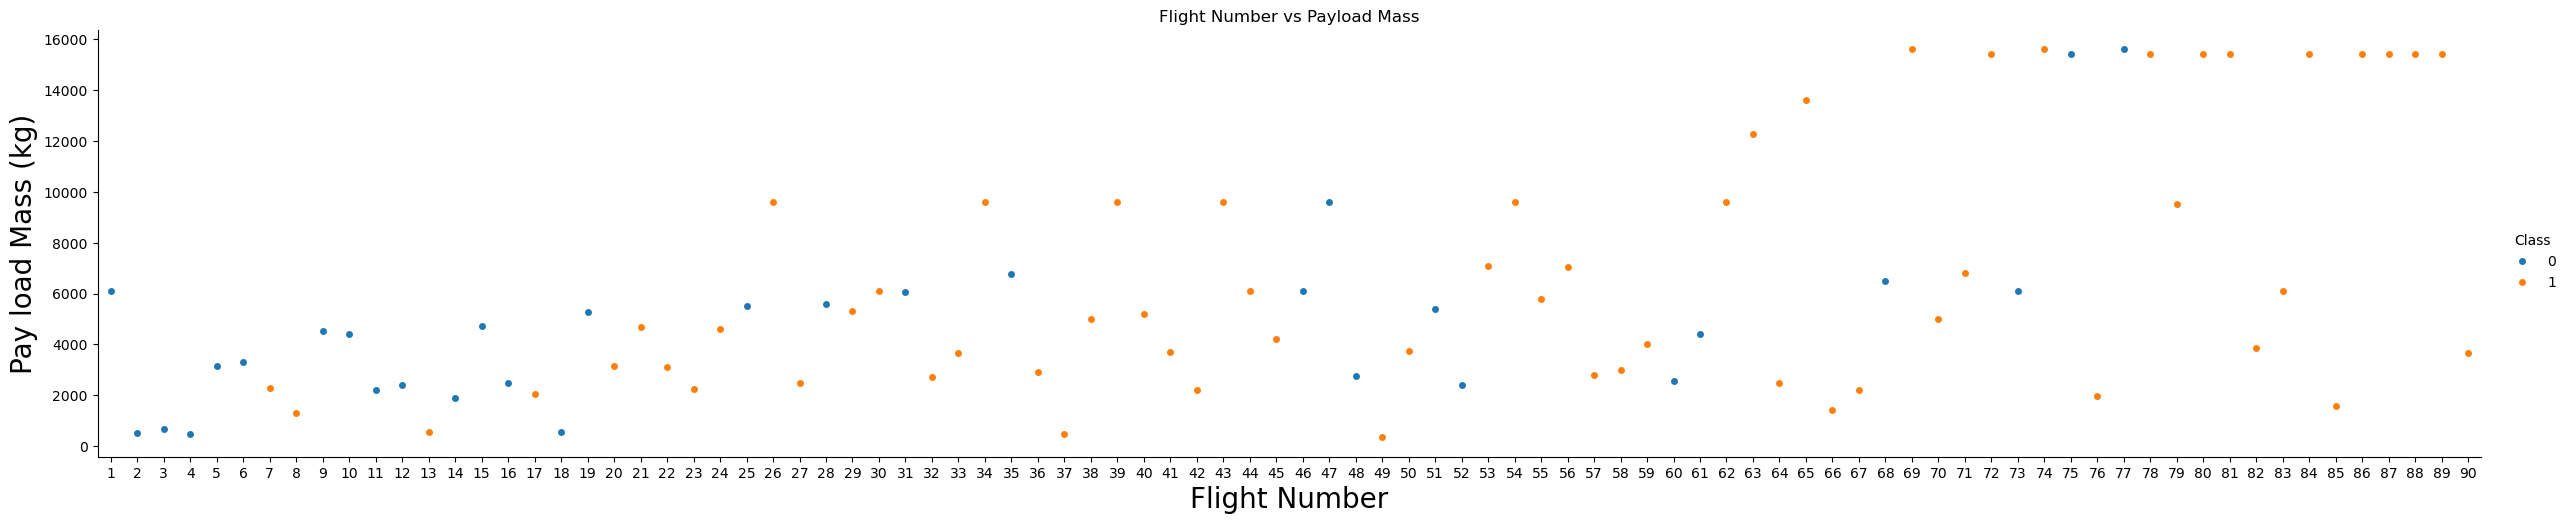

In [3]:
# Initial visualization - FlightNumber vs PayloadMass
plt.figure(figsize=(12, 6))
sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Pay load Mass (kg)", fontsize=20)
plt.title("Flight Number vs Payload Mass")
plt.show()



=== TASK 1: Flight Number vs Launch Site ===


<Figure size 1200x800 with 0 Axes>

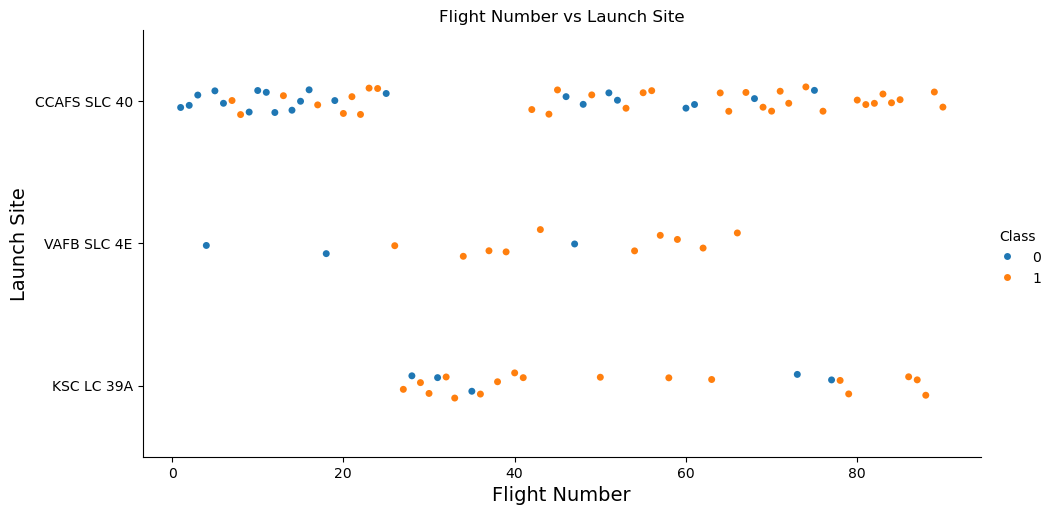

In [4]:
# TASK 1: Visualize the relationship between Flight Number and Launch Site
print("\n=== TASK 1: Flight Number vs Launch Site ===")
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Flight Number vs Launch Site")
plt.show()


=== TASK 2: Payload vs Launch Site ===


<Figure size 1200x800 with 0 Axes>

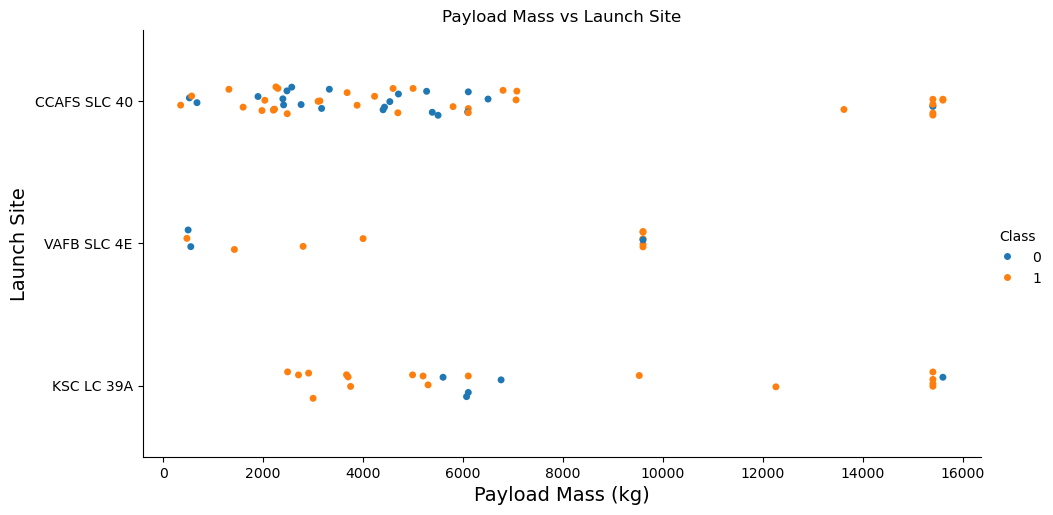

In [5]:
# TASK 2: Visualize the relationship between Payload and Launch Site
print("\n=== TASK 2: Payload vs Launch Site ===")
plt.figure(figsize=(12, 8))
sns.catplot(x="PayloadMass", y="LaunchSite", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Launch Site", fontsize=14)
plt.title("Payload Mass vs Launch Site")
plt.show()



=== TASK 3: Success Rate by Orbit Type ===
Success rate by orbit type:
Orbit
ES-L1    1.000000
GEO      1.000000
HEO      1.000000
SSO      1.000000
VLEO     0.857143
LEO      0.714286
PO       0.666667
MEO      0.666667
ISS      0.619048
GTO      0.518519
SO       0.000000
Name: Class, dtype: float64


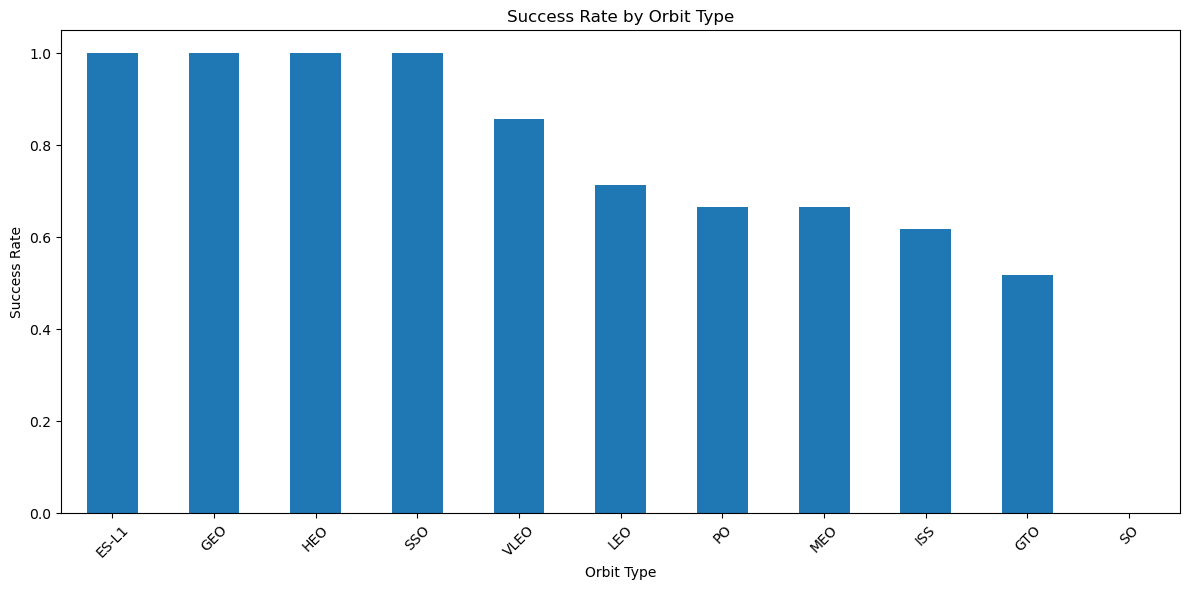

In [6]:
# TASK 3: Visualize the relationship between success rate of each orbit type
print("\n=== TASK 3: Success Rate by Orbit Type ===")
orbit_success = df.groupby('Orbit')['Class'].mean().sort_values(ascending=False)
print("Success rate by orbit type:")
print(orbit_success)

plt.figure(figsize=(12, 6))
orbit_success.plot(kind='bar')
plt.title('Success Rate by Orbit Type')
plt.xlabel('Orbit Type')
plt.ylabel('Success Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


=== TASK 4: Flight Number vs Orbit Type ===


<Figure size 1200x800 with 0 Axes>

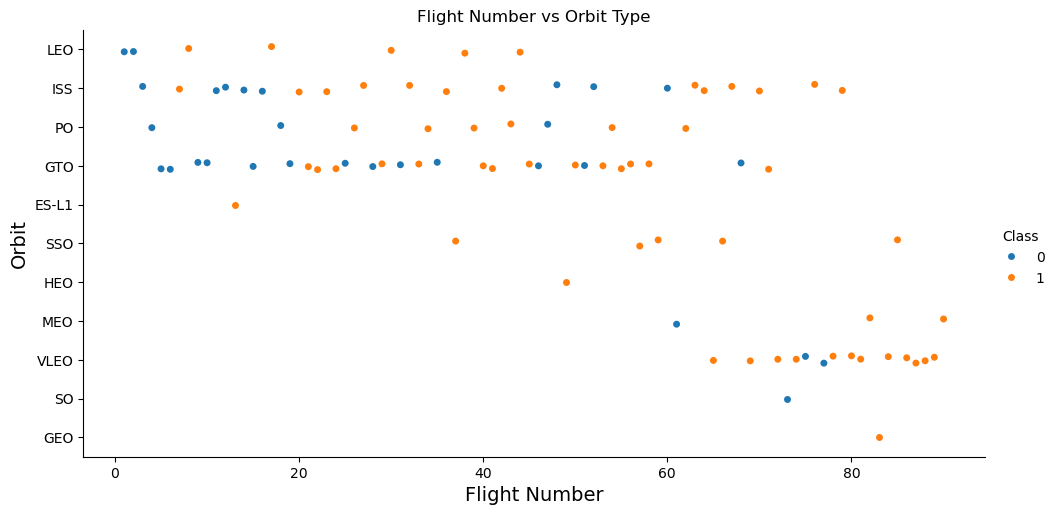

In [7]:

# TASK 4: Visualize the relationship between FlightNumber and Orbit type
print("\n=== TASK 4: Flight Number vs Orbit Type ===")
plt.figure(figsize=(12, 8))
sns.catplot(x="FlightNumber", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Flight Number", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Flight Number vs Orbit Type")
plt.show()


=== TASK 5: Payload vs Orbit Type ===


<Figure size 1200x800 with 0 Axes>

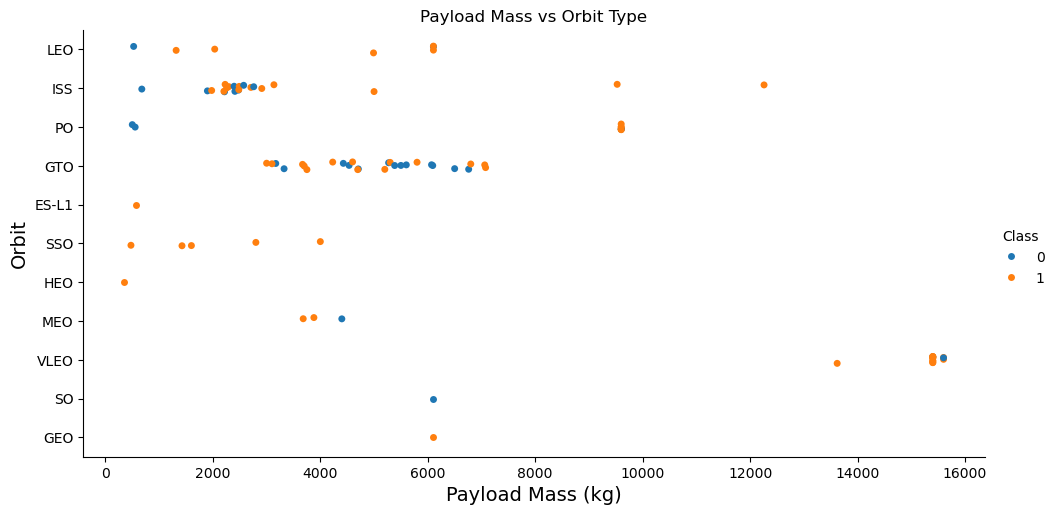

In [8]:
# TASK 5: Visualize the relationship between Payload and Orbit type
print("\n=== TASK 5: Payload vs Orbit Type ===")
plt.figure(figsize=(12, 8))
sns.catplot(x="PayloadMass", y="Orbit", hue="Class", data=df, aspect=2)
plt.xlabel("Payload Mass (kg)", fontsize=14)
plt.ylabel("Orbit", fontsize=14)
plt.title("Payload Mass vs Orbit Type")
plt.show()


=== TASK 6: Launch Success Yearly Trend ===
Yearly success rates:
Year
2010    0.000000
2012    0.000000
2013    0.000000
2014    0.333333
2015    0.333333
2016    0.625000
2017    0.833333
2018    0.611111
2019    0.900000
2020    0.842105
Name: Class, dtype: float64


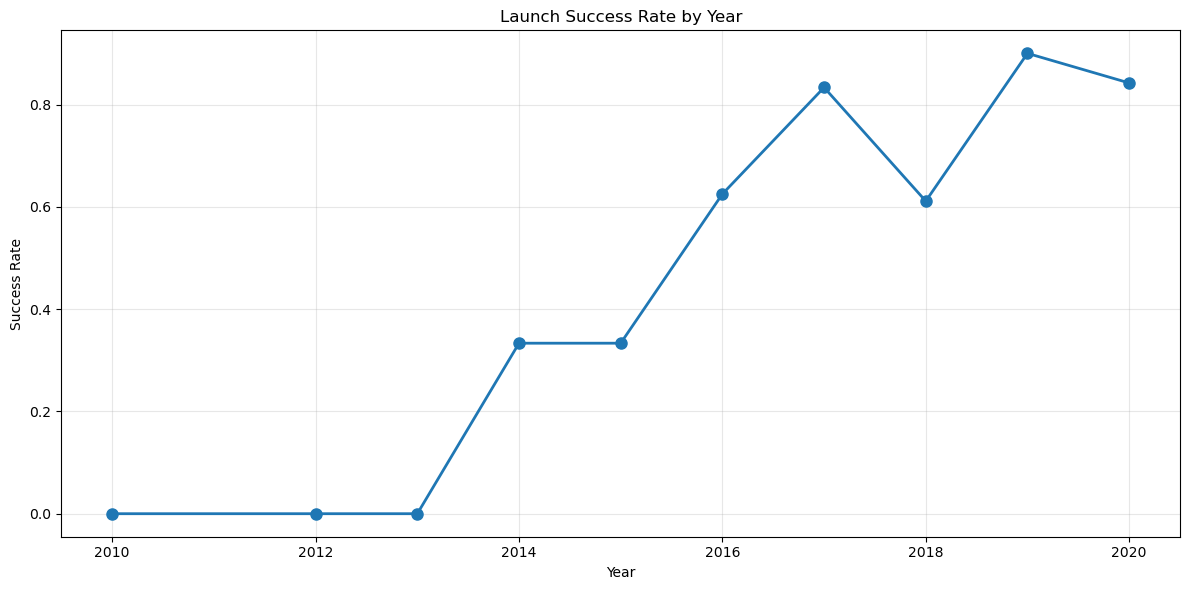


=== FEATURE ENGINEERING ===
Selected features:
   FlightNumber  PayloadMass Orbit    LaunchSite  Flights  GridFins  Reused  \
0             1  6104.959412   LEO  CCAFS SLC 40        1     False   False   
1             2   525.000000   LEO  CCAFS SLC 40        1     False   False   
2             3   677.000000   ISS  CCAFS SLC 40        1     False   False   
3             4   500.000000    PO   VAFB SLC 4E        1     False   False   
4             5  3170.000000   GTO  CCAFS SLC 40        1     False   False   

    Legs LandingPad  Block  ReusedCount Serial  
0  False        NaN    1.0            0  B0003  
1  False        NaN    1.0            0  B0005  
2  False        NaN    1.0            0  B0007  
3  False        NaN    1.0            0  B1003  
4  False        NaN    1.0            0  B1004  


In [9]:
# TASK 6: Visualize the launch success yearly trend
print("\n=== TASK 6: Launch Success Yearly Trend ===")

# Extract years from the date
def Extract_year(df):
    year = []
    for i in df["Date"]:
        year.append(int(i.split("-")[0]))
    return year

# Add year column
years = Extract_year(df)
df['Year'] = years

# Calculate yearly success rate
yearly_success = df.groupby('Year')['Class'].mean()
print("Yearly success rates:")
print(yearly_success)

plt.figure(figsize=(12, 6))
yearly_success.plot(kind='line', marker='o', linewidth=2, markersize=8)
plt.title('Launch Success Rate by Year')
plt.xlabel('Year')
plt.ylabel('Success Rate')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# FEATURE ENGINEERING SECTION
print("\n=== FEATURE ENGINEERING ===")

# Select features for analysis
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
print("Selected features:")
print(features.head())

In [10]:
# TASK 7: Create dummy variables to categorical columns
print("\n=== TASK 7: Create Dummy Variables ===")
# Apply OneHotEncoder to categorical columns
features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

print("Features after one-hot encoding:")
print(f"Shape: {features_one_hot.shape}")
print("Columns:", features_one_hot.columns.tolist())
print("\nFirst 5 rows:")
print(features_one_hot.head())



=== TASK 7: Create Dummy Variables ===
Features after one-hot encoding:
Shape: (90, 80)
Columns: ['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount', 'Orbit_ES-L1', 'Orbit_GEO', 'Orbit_GTO', 'Orbit_HEO', 'Orbit_ISS', 'Orbit_LEO', 'Orbit_MEO', 'Orbit_PO', 'Orbit_SO', 'Orbit_SSO', 'Orbit_VLEO', 'LaunchSite_CCAFS SLC 40', 'LaunchSite_KSC LC 39A', 'LaunchSite_VAFB SLC 4E', 'LandingPad_5e9e3032383ecb267a34e7c7', 'LandingPad_5e9e3032383ecb554034e7c9', 'LandingPad_5e9e3032383ecb6bb234e7ca', 'LandingPad_5e9e3032383ecb761634e7cb', 'LandingPad_5e9e3033383ecbb9e534e7cc', 'Serial_B0003', 'Serial_B0005', 'Serial_B0007', 'Serial_B1003', 'Serial_B1004', 'Serial_B1005', 'Serial_B1006', 'Serial_B1007', 'Serial_B1008', 'Serial_B1010', 'Serial_B1011', 'Serial_B1012', 'Serial_B1013', 'Serial_B1015', 'Serial_B1016', 'Serial_B1017', 'Serial_B1018', 'Serial_B1019', 'Serial_B1020', 'Serial_B1021', 'Serial_B1022', 'Serial_B1023', 'Serial_B1025', 'Serial_B1026', 'Ser


=== TASK 8: Cast to Float64 ===
Data types after conversion:
FlightNumber    float64
PayloadMass     float64
Flights         float64
GridFins        float64
Reused          float64
                 ...   
Serial_B1056    float64
Serial_B1058    float64
Serial_B1059    float64
Serial_B1060    float64
Serial_B1062    float64
Length: 80, dtype: object

Final dataset shape: (90, 80)
Final dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 80 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   FlightNumber                         90 non-null     float64
 1   PayloadMass                          90 non-null     float64
 2   Flights                              90 non-null     float64
 3   GridFins                             90 non-null     float64
 4   Reused                               90 non-null     float64
 5   Legs                       

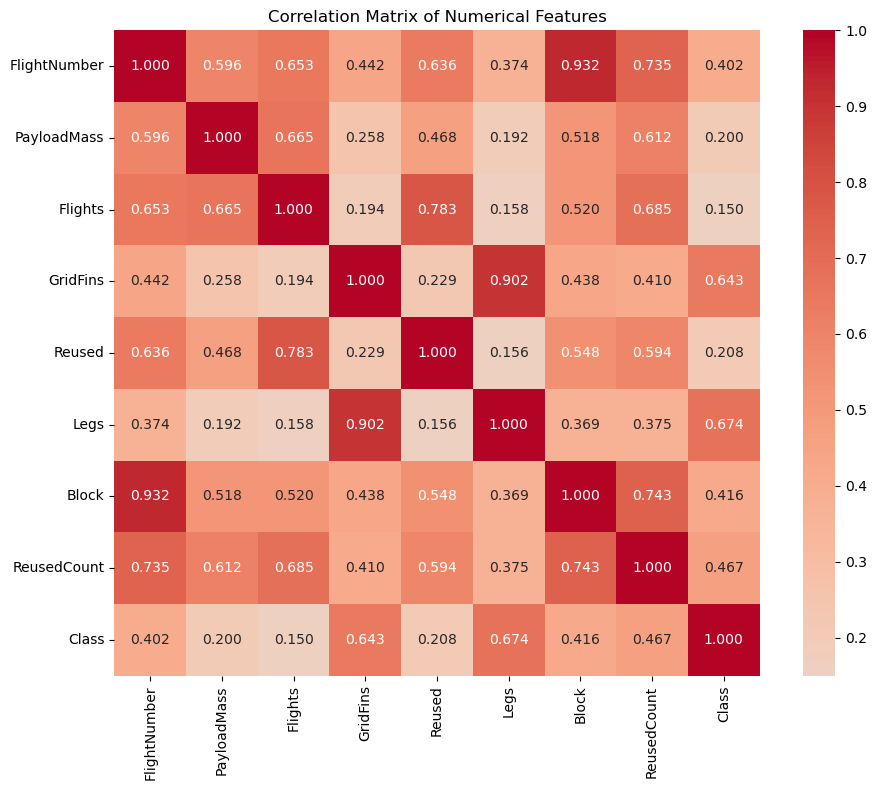


=== FEATURE ENGINEERING COMPLETE ===
Final processed dataset has 90 rows and 80 features
Dataset is ready for machine learning modeling!


In [11]:
# TASK 8: Cast all numeric columns to float64
print("\n=== TASK 8: Cast to Float64 ===")
features_one_hot = features_one_hot.astype('float64')

print("Data types after conversion:")
print(features_one_hot.dtypes)

print("\nFinal dataset shape:", features_one_hot.shape)
print("Final dataset info:")
print(features_one_hot.info())

# Save the processed dataset
# features_one_hot.to_csv('dataset_part_3.csv', index=False)
print("\n=== ANALYSIS SUMMARY ===")

print("\nKey Insights from the Analysis:")
print("1. Flight Number vs Launch Site: Later flights show higher success rates")
print("2. Payload vs Launch Site: VAFB-SLC doesn't handle heavy payloads (>10000 kg)")
print("3. Success Rate by Orbit:")
for orbit, rate in orbit_success.items():
    print(f"   - {orbit}: {rate:.2%}")
print("4. Flight Number vs Orbit: LEO shows improvement with flight number")
print("5. Heavy payloads succeed more in Polar, LEO, and ISS orbits")
print("6. Success rate improved significantly from 2013-2017")

# Additional analysis: Correlation matrix for numerical features
print("\n=== CORRELATION ANALYSIS ===")
numerical_features = ['FlightNumber', 'PayloadMass', 'Flights', 'GridFins', 'Reused', 'Legs', 'Block', 'ReusedCount']
correlation_with_target = df[numerical_features + ['Class']].corr()['Class'].sort_values(ascending=False)

print("Correlation with Success (Class):")
for feature, corr in correlation_with_target.items():
    if feature != 'Class':
        print(f"{feature}: {corr:.3f}")

# Visualize correlation matrix
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_features + ['Class']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, fmt='.3f')
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

print("\n=== FEATURE ENGINEERING COMPLETE ===")
print(f"Final processed dataset has {features_one_hot.shape[0]} rows and {features_one_hot.shape[1]} features")
print("Dataset is ready for machine learning modeling!")

## Authors


<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.


<a href="https://www.linkedin.com/in/nayefaboutayoun/">Nayef Abou Tayoun</a> is a Data Scientist at IBM and pursuing a Master of Management in Artificial intelligence degree at Queen's University.


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By | Change Description      |
| ----------------- | ------- | ---------- | ----------------------- |
| 2021-10-12        | 1.1     | Lakshmi Holla     | Modified markdown |
| 2020-09-20        | 1.0     | Joseph     | Modified Multiple Areas |
| 2020-11-10       | 1.1    | Nayef      | updating the input data |


Copyright © 2020 IBM Corporation. All rights reserved.
